In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from google.colab import drive
drive.mount('/content/drive')
from plotly.subplots import make_subplots
from scipy import stats
import os

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
df = pd.read_csv('dst-3.0_16_1_hh_database.csv', sep=';')


In [29]:
# вывод первых 10 строк
df.head(10)

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
0,"Мужчина , 39 лет , родился 27 ноября 1979",29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...",Опыт работы 16 лет 10 месяцев Август 2010 — п...,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,Неоконченное высшее образование 2000 Балтийск...,16.04.2019 15:59,Имеется собственный автомобиль
1,"Мужчина , 60 лет , родился 20 марта 1959",40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Опыт работы 19 лет 5 месяцев Январь 2000 — по...,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",Высшее образование 1981 Военно-космическая ак...,12.04.2019 08:42,Не указано
2,"Женщина , 36 лет , родилась 12 августа 1982",20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,Опыт работы 10 лет 3 месяца Октябрь 2004 — Де...,ПАО Сбербанк,Кассир-операционист,Среднее специальное образование 2002 Профессио...,16.04.2019 08:35,Не указано
3,"Мужчина , 38 лет , родился 25 июня 1980",100000 руб.,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,"Саратов , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, удаленная работа",Опыт работы 18 лет 9 месяцев Август 2017 — Ап...,OpenSoft,Инженер-программист,Высшее образование 2002 Саратовский государст...,08.04.2019 14:23,Не указано
4,"Женщина , 26 лет , родилась 3 марта 1993",140000 руб.,Региональный менеджер по продажам,"Москва , не готова к переезду , готова к коман...",полная занятость,полный день,Опыт работы 5 лет 7 месяцев Региональный мене...,Мармелад,Менеджер по продажам,Высшее образование 2015 Кгу Психологии и педаг...,22.04.2019 10:32,Не указано
5,"Мужчина , 29 лет , родился 5 октября 1989",25000 руб.,Технический специалист,"Старый Оскол , не готов к переезду , не готов ...",полная занятость,"полный день, сменный график",Опыт работы 9 лет 9 месяцев Технический специ...,Комбинат хлебопродуктов Старооскольский,Слесарь КИПиА,Неоконченное высшее образование 2013 Воронежс...,22.04.2019 15:59,Имеется собственный автомобиль
6,"Мужчина , 46 лет , родился 19 сентября 1972",250000 руб.,Руководитель ИТ-проектов,"Москва , не готов к переезду , готов к редким ...",полная занятость,полный день,Опыт работы 22 года 9 месяцев Руководитель ИТ...,"СИБИНТЕК, ООО ИК",Менеджер (Руководитель ИТ-проектов),Высшее образование 2008 ФГОУ ВПО «Уральская ак...,25.04.2019 22:48,Не указано
7,"Мужчина , 29 лет , родился 9 июля 1989",70000 руб.,Инженер АСУ ТП,"Москва , м. Бульвар Рокоссовского , готов к п...",полная занятость,полный день,Опыт работы 3 года 11 месяцев Декабрь 2016 — ...,ФМ-инжиниринг,Инженер АСУ ТП,Высшее образование 2014 Белорусская Государств...,07.05.2019 17:59,Не указано
8,"Мужчина , 29 лет , родился 11 июля 1989",65000 руб.,Ревизор,"Москва , м. Шоссе Энтузиастов , готов к перее...",полная занятость,полный день,Опыт работы 8 лет 9 месяцев Декабрь 2016 — по...,ФГБУ РСВО,Старший специалист,Неоконченное высшее образование 2020 Московск...,11.04.2019 11:08,Имеется собственный автомобиль
9,"Мужчина , 34 года , родился 26 мая 1984",55000 руб.,"Менеджер по работе с клиентами, Pre-sale менед...","Москва , м. Теплый Стан , не готов к переезду...",полная занятость,полный день,Опыт работы 16 лет 6 месяцев Июнь 2018 — по н...,"ООО ""Мираском""",Специалист отдела ИТ,Высшее образование 2007 Московский государств...,19.04.2019 11:39,Имеется собственный автомобиль


In [30]:
# вывод последних 3 строк
df.tail(3)

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
44741,"Женщина , 48 лет , родилась 26 декабря 1970",40000 руб.,"Аналитик данных, Математик","Челябинск , готова к переезду , готова к редки...",полная занятость,"полный день, удаленная работа",Опыт работы 21 год 5 месяцев Январь 1998 — по...,"ОАО «ЧМК», Исследовательско-Технологический Це...",Начальник группы аналитики,Высшее образование 2000 Южно-Уральский госуда...,09.04.2019 05:07,Не указано
44742,"Мужчина , 24 года , родился 6 октября 1994",20000 руб.,Контент-менеджер,"Тамбов , не готов к переезду , не готов к кома...","частичная занятость, полная занятость",удаленная работа,Опыт работы 3 года 10 месяцев Контент-менедже...,IQ-Maxima,Менеджер проектов,Высшее образование 2015 Тамбовский государств...,26.04.2019 14:25,Имеется собственный автомобиль
44743,"Мужчина , 38 лет , родился 25 апреля 1980",120000 руб.,Руководитель проекта,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 15 лет 10 месяцев Руководитель пр...,ПАО ГК ТНС энерго,Руководитель отдела технической поддержки,Высшее образование 1997 Южно-Российский госуд...,05.07.2018 20:15,Не указано


In [31]:
# информация
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

In [32]:
# размерность
df.shape

(44744, 12)

In [33]:
# информация о пропущенных значениях
df.isnull().sum()

,0
"Пол, возраст",0
ЗП,0
Ищет работу на должность:,0
"Город, переезд, командировки",0
Занятость,0
График,0
Опыт работы,168
Последнее/нынешнее место работы,1
Последняя/нынешняя должность,2
Образование и ВУЗ,0


In [34]:
df.describe()

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
count,44744,44744,44744,44744,44744,44744,44576,44743,44742,44744,44744,44744
unique,16003,690,14929,10063,38,47,44413,30214,16927,40148,18838,2
top,"Мужчина , 32 года , родился 17 сентября 1986",50000 руб.,Системный администратор,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 10 лет 8 месяцев Апрель 2018 — по...,Индивидуальное предпринимательство / частная п...,Системный администратор,Высшее образование 1987 Военный инженерный Кра...,07.05.2019 09:50,Не указано
freq,18,4064,3099,1261,30026,22727,3,935,2062,4,25,32268


In [35]:
df['Образование'] = df['Образование и ВУЗ'].apply(lambda x: x[:x.find("образование")].strip() if x.find("образование") != -1 else x)
df['Образование'].unique()


array(['Неоконченное высшее', 'Высшее', 'Среднее специальное', 'Среднее'],
      dtype=object)

In [36]:
# количество каждых образований
df['Образование'].value_counts()

,count
Образование,
Высшее,33863
Среднее специальное,5765
Неоконченное высшее,4557
Среднее,559


In [37]:
df['Пол'] = df['Пол, возраст'].apply(lambda x: f"{x.split(',')[0][0]}")
df['Возраст'] = df['Пол, возраст'].apply(lambda x: f"{x.split(',')[1].split()[0]}")
df.drop(['Пол, возраст'], axis=1, inplace=True)

In [38]:
# процент соотношения резюме М и Ж
df['Пол'].apply(lambda x: x.split(',')).value_counts(normalize=True)

,proportion
Пол,
[М],0.809293
[Ж],0.190707


In [39]:
# средний возраст соискателей
df['Возраст'].astype('int64').mean().round(2)

32.2

In [40]:
df['Опыт работы']

,Опыт работы
0,Опыт работы 16 лет 10 месяцев Август 2010 — п...
1,Опыт работы 19 лет 5 месяцев Январь 2000 — по...
2,Опыт работы 10 лет 3 месяца Октябрь 2004 — Де...
3,Опыт работы 18 лет 9 месяцев Август 2017 — Ап...
4,Опыт работы 5 лет 7 месяцев Региональный мене...
...,...
44739,"Опыт работы 7 лет 7 месяцев Финансист, аналит..."
44740,"Опыт работы 7 лет Системный администратор, IT..."
44741,Опыт работы 21 год 5 месяцев Январь 1998 — по...
44742,Опыт работы 3 года 10 месяцев Контент-менедже...


In [41]:
import re
def convert_experience_to_months(value):
    # Проверка на пропуски и скрытые пропуски
    if pd.isna(value) or value == "Не указано":
        return np.nan

    try:
        # Регулярное выражение для извлечения количества лет и месяцев
        years_match = re.search(r'(\d+)\s*(год|года|лет)', value)
        months_match = re.search(r'(\d+)\s*(месяц|месяца|месяцев)', value)

        # Извлекаем количество лет и месяцев
        years = int(years_match.group(1)) if years_match else 0
        months = int(months_match.group(1)) if months_match else 0

        # Преобразуем в месяцы
        return years * 12 + months

    except Exception as e:
        # На случай некорректных данных возвращаем NaN
        print(f"Error processing value: {value} -> {e}")
        return np.nan

# Применяем функцию к столбцу
df['Опыт работы (месяц)'] = df['Опыт работы'].apply(convert_experience_to_months)

# Вычисление медианного опыта работы
median_experience = df['Опыт работы (месяц)'].median()
print(f"Медианный опыт работы (в месяцах): {median_experience}")

# Удаление оригинального столбца
df.drop(['Опыт работы'], axis=1, inplace=True)

Медианный опыт работы (в месяцах): 100.0


In [42]:
import pandas as pd
import re

million_cities = ['Новосибирск', 'Екатеринбург', 'Нижний Новгород', 'Казань', 'Челябинск', 'Омск',
                  'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж', 'Волгоград']

def detected_cities(value):
    city = value.split(',')[0].strip()
    if city in million_cities:
        return 'город-миллионник'
    elif city in ['Москва', 'Санкт-Петербург']:
        return city
    else:
        return 'другие'

def detected_mission(value):
    return bool(re.search(r'командиров', value))

def detected_move(value):
    return bool(re.search(r'перее', value)) and not bool(re.search(r'не', value))

def process_columns(df):
    # Применяем функции сразу к нужным столбцам
    df['Город'] = df['Город, переезд, командировки'].apply(detected_cities)
    df['Готовность к переезду'] = df['Город, переезд, командировки'].apply(detected_move)
    df['Готовность к командировкам'] = df['Город, переезд, командировки'].apply(detected_mission)

    # Удаляем исходный столбец
    df.drop(['Город, переезд, командировки'], axis=1, inplace=True)

    return df

# Обрабатываем данные
df = process_columns(df)

# Анализируем данные
print('сколько процентов соискателей живут в Санкт-Петербурге')
print(df['Город'].value_counts(normalize=True))

print('Сколько процентов соискателей готовы одновременно и к переездам, и к командировкам')
print((df['Готовность к переезду'] & df['Готовность к командировкам']).value_counts(normalize=True))


сколько процентов соискателей живут в Санкт-Петербурге
Город
Москва              0.371469
другие              0.354327
город-миллионник    0.163866
Санкт-Петербург     0.110339
Name: proportion, dtype: float64
Сколько процентов соискателей готовы одновременно и к переездам, и к командировкам
False    0.692473
True     0.307527
Name: proportion, dtype: float64


In [43]:
df['частичная занятость'] = df['Занятость'].apply(lambda x: 'частичная занятость' in x)
df['проектная работа'] = df['Занятость'].apply(lambda x: 'проектная работа' in x)
df['полная занятость'] = df['Занятость'].apply(lambda x: 'полная занятость' in x)
df['стажировка'] = df['Занятость'].apply(lambda x: 'стажировка' in x)
df['волонтерство'] = df['Занятость'].apply(lambda x: 'волонтерство' in x)

df['гибкий график'] = df['График'].apply(lambda x: 'гибкий график' in x)
df['полный день'] = df['График'].apply(lambda x: 'полный день' in x)
df['сменный график'] = df['График'].apply(lambda x: 'сменный график' in x)
df['вахтовый метод'] = df['График'].apply(lambda x: 'вахтовый метод' in x)
df['удаленная работа'] = df['График'].apply(lambda x: 'удаленная работа' in x)

# Сколько людей ищут проектную работу и волонтёрство
print('Сколько людей ищут проектную работу и волонтёрство')
print(df[(df['проектная работа']) & (df['волонтерство'])].shape[0])
# Сколько людей хотят работать вахтовым методом и с гибким графиком
print('Сколько людей хотят работать вахтовым методом и с гибким графиком')
print(df[(df['вахтовый метод']) & (df['гибкий график'])].shape[0])

# удаление
df.drop(['частичная занятость','проектная работа','полная занятость','стажировка','волонтерство','гибкий график','полный день','сменный график','вахтовый метод','удаленная работа'],
        axis=1,
        inplace=True)

Сколько людей ищут проектную работу и волонтёрство
436
Сколько людей хотят работать вахтовым методом и с гибким графиком
2311


In [45]:
import pandas as pd
import numpy as np

# Загрузка данных
df_rates = pd.read_csv('ExchangeRates.csv', sep=',')
df_rates['proportion'] = df_rates['proportion'].astype(float)

# Преобразуем валюту в словарь для быстрого поиска
currency_dict = {
    'грн': 'UAH', 'USD': 'USD', 'EUR': 'EUR',
    'белруб': 'BYN', 'KGS': 'KGS', 'сум': 'UZS',
    'AZN': 'AZN', 'KZT': 'KZT', 'руб': 'RUB'
}

# Функция для преобразования зарплаты
def convert_salary(row, rate_dict):
    salary_data = row['ЗП'].split()
    amount = float(salary_data[0])
    currency = salary_data[1].replace('.', '')  # Убираем точку, если есть

    # Преобразуем валюту, если она известна
    currency = currency_dict.get(currency, None)

    if currency is None:
        print(f"Unknown currency: {salary_data[1]}")
        return np.nan

    # Если валюта в рублях, возвращаем сумму
    if currency == 'RUB':
        return amount

    # Если валюта не в рублях, используем словарь для поиска курса
    update_date = row['Обновление резюме']
    if update_date in rate_dict and currency in rate_dict[update_date]:
        rate = rate_dict[update_date][currency]
        return amount * (rate['close'] / rate['proportion'])

    return np.nan  # Если курс не найден, возвращаем NaN

# Преобразуем даты
df['Обновление резюме'] = pd.to_datetime(df['Обновление резюме'], dayfirst=True).dt.date
df_rates['date'] = pd.to_datetime(df_rates['date'], dayfirst=True).dt.date

# Создаём словарь для поиска курса по дате и валюте
rate_dict = {}
for _, row in df_rates.iterrows():
    date = row['date']
    currency = row['currency']
    if date not in rate_dict:
        rate_dict[date] = {}
    rate_dict[date][currency] = row

# Применяем функцию
df['ЗП (руб)'] = df.apply(lambda row: convert_salary(row, rate_dict), axis=1)

# Удаляем старый столбец
df.drop(['ЗП'], axis=1, inplace=True)

# Медианная зарплата в рублях
print(f'Медианная зп в рублях {df["ЗП (руб)"].median() // 1000}')


<ipython-input-45-9b0e90786c68>:42: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_rates['date'] = pd.to_datetime(df_rates['date'], dayfirst=True).dt.date


Медианная зп в рублях 59.0


In [55]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import os

# Преобразуем возраст в числовой формат
df['Возраст'] = pd.to_numeric(df['Возраст'], errors='coerce')

# Гистограмма
fig1 = px.histogram(
    data_frame=df,
    x='Возраст',
    histfunc='count',
    nbins=20,  # Настроим количество бинов
    title="Распределение соискателей по возрасту",
    color_discrete_sequence=['#0CCDDB'],  # Цвет для столбцов
)

# Настройка стиля гистограммы
fig1.update_layout(
    xaxis_title='Возраст',
    yaxis_title='Количество',
    template='plotly_dark',  # Темная тема для улучшения контраста
    bargap=0.2,  # Расстояние между столбцами
    title_x=0.5  # Заголовок по центру
)

# Box plot
fig2 = px.box(
    data_frame=df,
    x='Возраст',
    title="Возраст соискателей",
    color_discrete_sequence=['#FF6347']  # Цвет для box-plot
)

# Настройка стиля box-plot
fig2.update_layout(
    xaxis_title='Возраст',
    yaxis_title='',
    template='plotly_dark',
    title_x=0.5  # Заголовок по центру
)

# Создаем подграфики
fig = make_subplots(
    rows=2, cols=1, shared_xaxes=True,
    subplot_titles=['Распределение соискателей по возрасту'],
    vertical_spacing=0.15
)

# Добавляем гистограмму и box-plot
fig.add_trace(fig1['data'][0], row=1, col=1)
fig.add_trace(fig2['data'][0], row=2, col=1)

# Настройка общего макета
fig.update_layout(
    height=800,
    title='Возраст соискателей',
    title_x=0.5,  # Заголовок по центру
    showlegend=False  # Скрываем легенду
)

# Создаем папку для сохранения, если она не существует
os.makedirs('plots', exist_ok=True)

# Сохраняем график в формате HTML
fig.write_html("plots/graph1.html")

# Показываем график
fig.show()


In [57]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import os

# Гистограмма для опыта работы
fig1 = px.histogram(
    data_frame=df,
    x='Опыт работы (месяц)',
    histfunc='count',
    nbins=30,  # Количество бинов для гистограммы
    title="Распределение соискателей по опыту работы",
    color_discrete_sequence=['#0CCDDB'],  # Цвет для столбцов
)

# Настройка стиля гистограммы
fig1.update_layout(
    xaxis_title='Опыт работы (месяц)',
    yaxis_title='Количество',
    template='plotly_dark',  # Темная тема для улучшения контраста
    bargap=0.2,  # Расстояние между столбцами
    title_x=0.5  # Заголовок по центру
)

# Box plot для опыта работы
fig2 = px.box(
    data_frame=df,
    x='Опыт работы (месяц)',
    title="Опыт работы соискателей",
    color_discrete_sequence=['#FF6347']  # Цвет для box-plot
)

# Настройка стиля box-plot
fig2.update_layout(
    xaxis_title='Опыт работы (месяц)',
    yaxis_title='',
    template='plotly_dark',
    title_x=0.5  # Заголовок по центру
)

# Создаем подграфики
fig = make_subplots(
    rows=2, cols=1, shared_xaxes=True,
    subplot_titles=['Распределение соискателей по опыту работы'],
    vertical_spacing=0.15
)

# Добавляем гистограмму и box-plot
fig.add_trace(fig1['data'][0], row=1, col=1)
fig.add_trace(fig2['data'][0], row=2, col=1)

# Настройка общего макета
fig.update_layout(
    height=800,
    title='Опыт работы соискателей',
    title_x=0.5,  # Заголовок по центру
    showlegend=False  # Скрываем легенду
)

# Создаем папку для сохранения, если она не существует
os.makedirs('plots', exist_ok=True)

# Сохраняем график в формате HTML
fig.write_html("plots/graph2.html")

# Показываем график
fig.show()


In [58]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import os

# Гистограмма для зарплаты
fig1 = px.histogram(
    data_frame=df,
    x='ЗП (руб)',
    histfunc='count',
    nbins=40,  # Количество бинов для гистограммы
    title="Распределение соискателей по ЗП (руб)",
    color_discrete_sequence=['#0CCDDB'],  # Цвет для столбцов
)

# Настройка стиля гистограммы
fig1.update_layout(
    xaxis_title='ЗП (руб)',
    yaxis_title='Количество',
    template='plotly_dark',  # Темная тема для улучшения контраста
    bargap=0.2,  # Расстояние между столбцами
    title_x=0.5  # Заголовок по центру
)

# Box plot для зарплаты
fig2 = px.box(
    data_frame=df,
    x='ЗП (руб)',
    title="Зарплата соискателей",
    color_discrete_sequence=['#FF6347']  # Цвет для box-plot
)

# Настройка стиля box-plot
fig2.update_layout(
    xaxis_title='ЗП (руб)',
    yaxis_title='',
    template='plotly_dark',
    title_x=0.5  # Заголовок по центру
)

# Создаем подграфики
fig = make_subplots(
    rows=2, cols=1, shared_xaxes=True,
    subplot_titles=['Распределение соискателей по ЗП'],
    vertical_spacing=0.15
)

# Добавляем гистограмму и box-plot
fig.add_trace(fig1['data'][0], row=1, col=1)
fig.add_trace(fig2['data'][0], row=2, col=1)

# Настройка общего макета
fig.update_layout(
    height=800,
    title='Зарплата соискателей',
    title_x=0.5,  # Заголовок по центру
    showlegend=False  # Скрываем легенду
)

# Создаем папку для сохранения, если она не существует
os.makedirs('plots', exist_ok=True)

# Сохраняем график в формате HTML
fig.write_html("plots/graph3.html")

# Показываем график
fig.show()


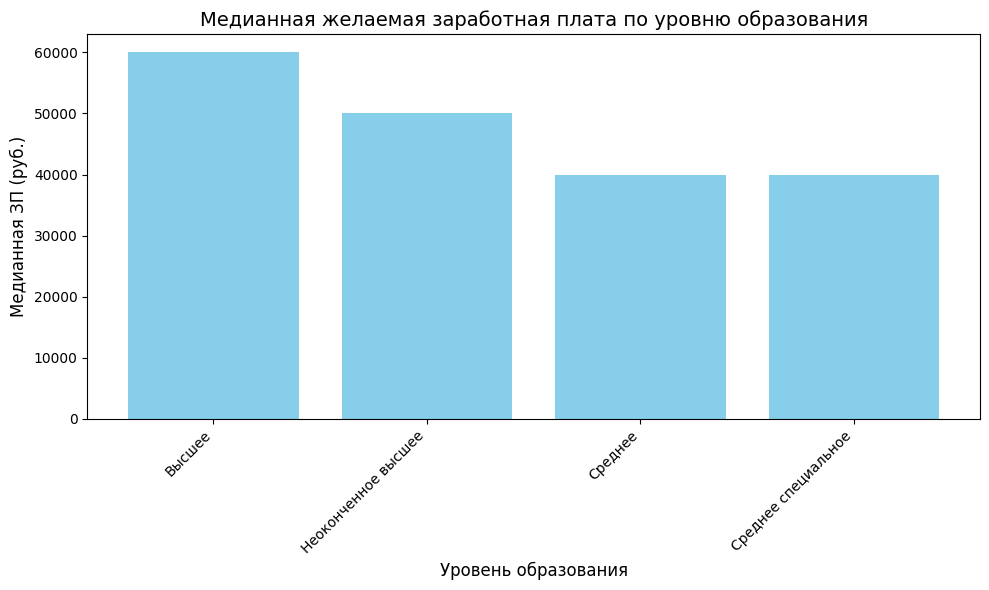

In [49]:
df_filtered = df[df['ЗП (руб)'] < 1000000]

plt.figure(figsize=(10, 6))
plt.bar(df_filtered.groupby('Образование')['ЗП (руб)'].median().reset_index()['Образование'], df_filtered.groupby('Образование')['ЗП (руб)'].median().reset_index()['ЗП (руб)'], color='skyblue')
plt.xticks(rotation=45, ha='right')  # Поворот подписей для улучшения читаемости
plt.title('Медианная желаемая заработная плата по уровню образования', fontsize=14)
plt.xlabel('Уровень образования', fontsize=12)
plt.ylabel('Медианная ЗП (руб.)', fontsize=12)
plt.tight_layout()  # Подгонка графика
plt.show()

In [59]:
import plotly.express as px
import os

# Создаем box plot для распределения ЗП по городам
fig = px.box(
    data_frame=df_filtered,
    x='ЗП (руб)',
    y='Город',
    color='Город',
    title='Распределение ожидаемой ЗП в зависимости от города соискателя',
    color_discrete_sequence=px.colors.qualitative.Set3  # Яркая палитра цветов
)

# Настройка стиля box plot
fig.update_layout(
    title='Распределение ожидаемой ЗП в зависимости от города соискателя',
    title_x=0.5,  # Заголовок по центру
    xaxis_title='ЗП (руб)',
    yaxis_title='Город',
    template='plotly_dark',  # Темная тема для улучшения контраста
    boxmode='group',  # Разделение ящиков по городам
    height=600,  # Высота графика
    showlegend=False,  # Скрытие легенды
)

# Создаем папку для сохранения, если она не существует
os.makedirs('plots', exist_ok=True)

# Сохраняем график в формате HTML
fig.write_html("plots/graph4.html")

# Показываем график
fig.show()


In [60]:
import plotly.express as px
import os

# Группировка данных по признакам "Готовность к переезду" и "Готовность к командировкам"
median_salary = df_filtered.groupby(['Готовность к переезду', 'Готовность к командировкам'])['ЗП (руб)'].median().reset_index()

# Создаем bar plot для медианной зарплаты
fig = px.bar(
    median_salary,
    x='Готовность к переезду',
    y='ЗП (руб)',
    color='Готовность к командировкам',
    barmode='group',  # Столбцы для разных категорий "Готовность к командировкам" рядом
    color_discrete_sequence=px.colors.qualitative.Set2,  # Яркая палитра цветов
    labels={
        'Готовность к переезду': 'Готовность к переезду',
        'ЗП (руб)': 'Медианная ЗП (руб)',
        'Готовность к командировкам': 'Готовность к командировкам'
    },
    title="Медианная заработная плата в зависимости от готовности к переезду и командировкам",
    template='plotly_dark'  # Темная тема для улучшения контраста
)

# Настройка макета
fig.update_layout(
    title_x=0.5,  # Заголовок по центру
    xaxis_title='Готовность к переезду',
    yaxis_title='Медианная ЗП (руб)',
    xaxis=dict(tickmode='array'),  # Четкие метки на оси X
    yaxis=dict(tickformat=',.0f'),  # Форматирование оси Y для отображения чисел без десятичных
    height=500,  # Высота графика для лучшего восприятия
    bargap=0.3,  # Увеличиваем расстояние между группами столбцов
    showlegend=True  # Показываем легенду
)

# Сохраняем график в HTML
os.makedirs('plots', exist_ok=True)
fig.write_html("plots/graph5.html")

# Показываем график
fig.show()


In [61]:
import plotly.express as px
import os

# Создание сводной таблицы
pivot_table = df_filtered.pivot_table(
    values='ЗП (руб)',
    index='Возраст',
    columns='Образование',
    aggfunc='median'
).reset_index()

# Построение тепловой карты с использованием plotly.express
fig = px.imshow(
    pivot_table.set_index('Возраст').T,
    labels={'x': 'Возраст', 'y': 'Образование', 'color': 'Медианная ЗП (руб)'},
    color_continuous_scale='YlGnBu',  # Используем более контрастную палитру
    title='Тепловая карта медианной заработной платы по возрасту и образованию'
)

# Настройка внешнего вида графика
fig.update_layout(
    title='Тепловая карта медианной заработной платы по возрасту и образованию',
    title_x=0.5,  # Заголовок по центру
    xaxis_title='Возраст',
    yaxis_title='Образование',
    coloraxis_colorbar_title='Медианная ЗП (руб)',
    width=1400,  # Ширина графика
    height=600,  # Высота графика
    template='plotly_dark',  # Применяем темную тему для лучшего контраста
    margin=dict(l=50, r=50, t=80, b=50)  # Добавляем отступы для лучшего восприятия
)

# Отображаем график
fig.show()

# Сохраняем график в файл HTML
os.makedirs('plots', exist_ok=True)
fig.write_html("plots/graph6.html")


In [62]:
import plotly.express as px
import os

# Создание новой переменной для опыта работы в годах
df['Опыт работы (годы)'] = df['Опыт работы (месяц)'] / 12

# Построение диаграммы рассеяния
fig = px.scatter(
    df,
    x='Возраст',
    y='Опыт работы (годы)',
    title="Зависимость опыта работы от возраста"
)

# Обновление внешнего вида точек на графике
fig.update_traces(
    marker=dict(size=8, color='blue', opacity=0.6, line=dict(width=1, color='black'))
)

# Добавление прямой y=x, где опыт работы равен возрасту
fig.add_shape(
    type='line',
    x0=0,
    y0=0,
    x1=100,
    y1=100,
    line=dict(color='red', dash='dash', width=2)
)

# Настройка подписей и отображения графика
fig.update_layout(
    xaxis_title="Возраст",
    yaxis_title="Опыт работы (годы)",
    showlegend=False,
    template='plotly_dark',  # Темная тема для улучшения контраста
    width=800,  # Ширина графика
    height=600,  # Высота графика
    title_x=0.5,  # Центрирование заголовка
    xaxis=dict(showgrid=True, zeroline=True),  # Добавление сетки на оси X
    yaxis=dict(showgrid=True, zeroline=True)  # Добавление сетки на оси Y
)

# Отображение графика
fig.show()

# Удаляем временный столбец для опыта работы в годах
df.drop(['Опыт работы (годы)'], axis=1, inplace=True)

# Сохранение графика в файл HTML
os.makedirs('plots', exist_ok=True)
fig.write_html("plots/graph7.html")
